### Imports

In [1]:
from os import path
import pandas as pd
import matplotlib.pyplot as plt

### Data EDA

In [2]:
DATA_PATH = path.dirname(path.realpath("__file__"))
DATA = path.join(DATA_PATH, 'data')

data_ratings = pd.read_csv(DATA + r'\ratings.csv')
data_movies = pd.read_csv(DATA + r'\movies.csv')

In [3]:
data = pd.merge(left = data_ratings, right = data_movies, on = 'movieId')

In [4]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [5]:
data.rating.value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [6]:
print(f"Mean ratings: {data.rating.mean()}")
print(f"Median ratings: {data.rating.median()}")

Mean ratings: 3.501556983616962
Median ratings: 3.5


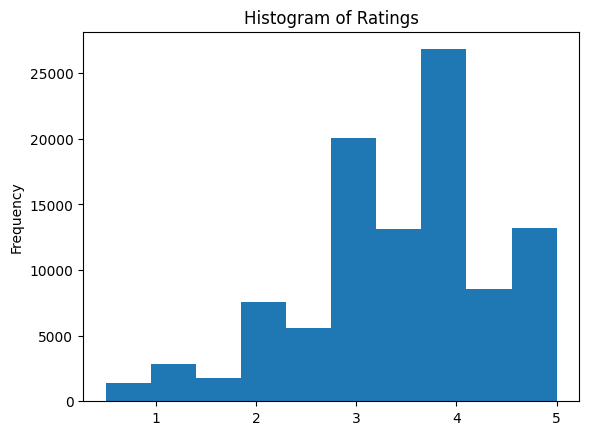

In [7]:
data.rating.plot(kind = 'hist', title = 'Histogram of Ratings');

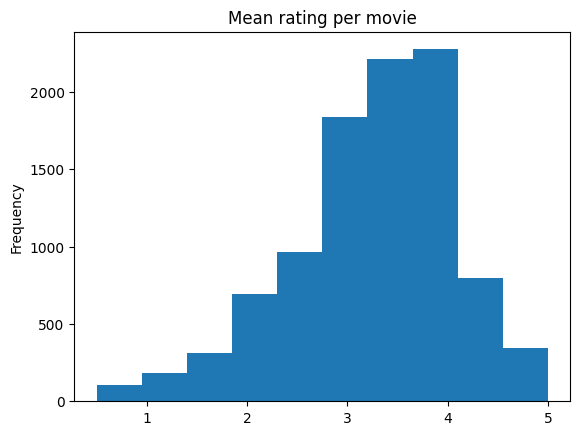

In [8]:
mean_rating_per_movie = data.groupby('movieId')['rating'].mean()
mean_rating_per_movie.plot(kind='hist', title = 'Mean rating per movie');

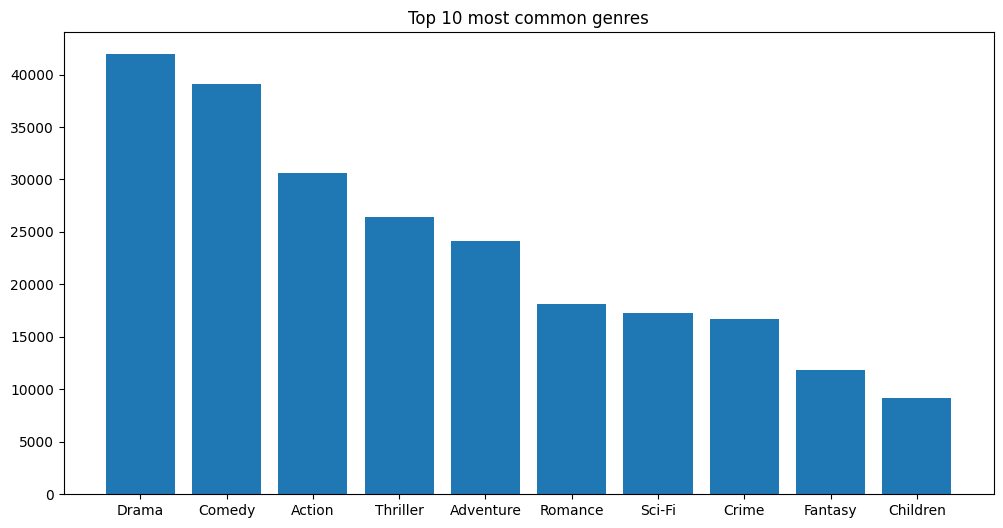

In [9]:
genres = data['genres']
grs = []
genres_list = genres.tolist()
for genre in genres_list:
  grs_split = genre.split('|')
  for word in grs_split:
    grs.append(word)
freq_genres = pd.Series(grs).value_counts()[:10]

f, axes = plt.subplots(1, figsize=(12, 6), sharex=False)

rects1 = axes.bar(freq_genres.index, freq_genres.values,)
axes.set_title('Top 10 most common genres')
plt.show()